## Event reproducibility, manifold attractors, and functional connectivity analysis of Spiking simulations

Saved data only here, to run the simulation please refere to the companion repository.

- random connectivity: events but not reproducibility
- range connectivity:
    - event reproducibility
    - manifold attractors
    - cores and functional connectivity

In [74]:
from platform import python_version
print(python_version())

%run -i 'imports_functions.py' 

%matplotlib inline

3.10.4


### Testing multiple seeds
Given the same structure network, we want to know 
- if same stimuli will produce same population events.
- if a different seed will change the population events

We use a Frozen noise approach. We produced a Poissonian spike population of 10000 units (large number to avoid input correlations), randomly connected (5%) to the population we simulate.    
We let the input population run alone for 6sec (0.1 dt). This will be the **frozen input with seed1**.    
We then take the spikes produced with seed1, and change the spike timings (normally distributed between 0 and 150 ms). This will give the **frozen input with seed2**.     
This strategy can be used to run multiple simulations.

In [75]:
stimulus_seed1_spiketrains = np.load('simulations/spikes/spiketrains_seed1.npy', allow_pickle=True)
print(stimulus_seed1_spiketrains.shape)
print(len(stimulus_seed1_spiketrains[0]))
print(stimulus_seed1_spiketrains[0][0:0+5])
print(stimulus_seed1_spiketrains[0][234:234+5])

# generation of synthetic spiketrain based on previous.
# stimulus_seed2_spiketrains = np.load('simulations/spikes/spiketrains_seed1.npy', allow_pickle=True)
# stimulus_seed2_spiketrains += np.random.randint(low=0, high=150,size=len(stimulus_seed2_spiketrains))
# np.save('simulations/spikes/spiketrains_seed2.npy', stimulus_seed2_spiketrains)

stimulus_seed2_spiketrains = np.load('simulations/spikes/spiketrains_seed2.npy', allow_pickle=True)
print(stimulus_seed2_spiketrains.shape)
print(len(stimulus_seed2_spiketrains[0]))
print(stimulus_seed2_spiketrains[0][0:0+5])
print(stimulus_seed2_spiketrains[0][234:234+5])

(10000,)
239
[ 11.   54.6 162.5 764.3 814.2]
[59616.8 59709.5 59719.8 59877.9 59905.8]
(10000,)
239
[ 65.  108.6 216.5 818.3 868.2]
[59670.8 59763.5 59773.8 59931.9 59959.8]


## Datasets
The simulated spiketrains used in Figure 5, panels a-f, are in the file `spiketrains_py.npy`. This is labeled here as *scan_id 0*.      
The simulated spiketrains used in figure 5g are in the files `spiketrains_py_frozen1.npy` (stimulated with seed1 two times) and `spiketrains_py_frozen2.npy` (stimulated with seed1 and seed2).

Commenting out the different loads will produce the plots for each condition.

In [86]:
all_spiketrains = np.load('simulations/spiketrains_py.npy', allow_pickle=True)
scan_id = 0
all_spiketrains = np.load('simulations/spiketrains_py_frozen1.npy', allow_pickle=True)
scan_id = 1 # first half (6sec) seed as 0, second half (6sec) same seed as first half
all_spiketrains = np.load('simulations/spiketrains_py_frozen2.npy', allow_pickle=True)
scan_id = 2 # first half (6sec) seed as 0, second half (6sec) new seed
print("... loaded",len(all_spiketrains), "spiketrains")
# turn dt into seconds
all_spiketrains /= 10000. # dt=0.1ms

exp_path = os.getcwd() + "/simulations/"

# frame_duration = 0.0001 # 0.1 msec (e.g. 4048.4493 s)
# frame_duration = 0.001 # 1 msec (e.g. 4048.449 s)
frame_duration = 0.01 # 10ms (e.g. 4048.45 s) almost as in two-photon

... loaded 10000 spiketrains


In [87]:
# subsampling: there is a limit for calloc()
all_cell_ids = np.array(list(range(len(all_spiketrains))))
chosen_cell_indexes = sorted(np.random.choice(len(all_spiketrains), 2000, replace=False))
removed_cell_indexes = np.delete(all_cell_ids, chosen_cell_indexes)
cell_ids = sorted(all_cell_ids[chosen_cell_indexes])

scan_spiketrains = []
for spiketrain in [all_spiketrains[i] for i in chosen_cell_indexes]:
    scan_spiketrains.append(spiketrain[50:])
cell_indexes = range(0,len(chosen_cell_indexes)) # go to 0 to tot instead of jumping indexes, to be consistent with the spiketrains from now on
print("... retained",len(scan_spiketrains), "spiketrains")

... retained 2000 spiketrains


---
## Dynamical analysis

To be written

In [90]:
print("... scan id:",scan_id)

core_reproducibility_perc = 95. # threshold for detecting cores
core_reproducibility_perc = 60 # threshold for detecting cores

start_time = 0.
start_time = 6.
exp_tstart = start_time
print("    start time:", start_time)
stop_time = max([max(st) if len(st) else 0 for st in scan_spiketrains])
# stop_time = 6.0 # to compare frozen 1 and frozen 2
print("    stop time:", stop_time)
time = np.arange(start_time, stop_time, frame_duration)

print("... producing spike rasterplot")
fig = plt.figure()
for row,train in enumerate(scan_spiketrains):
    plt.scatter( train, [row]*len(train), marker='o', edgecolors='none', s=1, c='k' )
plt.ylabel("cell IDs")
plt.xlabel("time (s)")
fig.savefig(exp_path+'/results/rasterplot.png', transparent=True, dpi=800)
plt.close()
fig.clear()
fig.clf()

ophys_cell_ids = list(range(len(scan_spiketrains)))
ophys_cell_indexes = ophys_cell_ids # alias

%run "dynamical_analysis.ipynb"

... scan id: 2
    start time: 6.0
    stop time: 12.0
... producing spike rasterplot
    population firing: 744.00±480.56 sp/frame
    cells firing rate: 0.37±1.09 sp/s
... generating surrogates to establish population event threshold
... loaded surrogates
    event size threshold (mean): 1105.0979542793705
    find peaks
    find minima
    find population events
    signatures of population events
    number of events: 38
    number of events per sec: 3.1666666666666665
    events duration: 0.085±0.022
    events size: 1721.500±137.372
    Similarity of events matrix
    clustering - linkage
    surrogate events signatures for clustering threshold
   ... loaded surrogates
    cluster reproducibility threshold: 0.0
    cluster size threshold: 2
    Total number of clusters: 30
    # clusters (after removing those below reproducibility threshold): 6
    event color assignment
    unique color assignments
    clustered similarity map
    finding cluster cores
    removing cores firing 

---
## Manifold attractor analysis


In [5]:
print("... Manifold Analysis")
mousename=area=ipop=0 # as for other experiments :)
%run "attractor_analysis.ipynb"

... Manifold Analysis
... Starting attractor analysis


/opt/conda/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


    coloring frames
    finding trajectories
    trajectories lengths: 14.77±13.38 (median:9.00)
... performing dimensionality reduction of the state space (using PCA)


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/opt/conda/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


... testing cluster manifolds


---
## Structural analysis

Creating graph from the actual connectivity matrix

In [6]:
cell_coords = []
with open('simulations/py_default0_positions.txt', 'r') as posfile:
    lines = posfile.readlines()
    posfile.close()
    for line in lines:
        cell_coords.append( [int(float(i)) for i in line.split(' ')[:4]] ) # id, index, x, y (not including z (4))
        # print(cell_coords) # id, idx, x, y
        #[ ..., [13287, 4064, 63, 32], [13288, 4065, 63, 33], ... ]
    cell_coords = np.array(cell_coords)

print(cell_coords[0])
# print(cell_ids)

# Adjecency matrix
# # old NEST versions
# adjacency_matrix = np.nan_to_num(np.load(folder+'/connections_'+connskey+'.npy'))
# print("    ", connskey, "conns, shape", adjacency_matrix.shape)
# # new NEST version
conns = np.load('simulations/connections_py_py.npy')
print("    py_py conns, shape", conns.shape)
conns[np.isnan(conns)] = 0.0 # to avoid NaN
edges = [ [int(i[0]),int(i[1])] for i in conns ]
print("    nodes:",np.max(edges)+1)
full_adjacency_matrix = np.zeros( (np.max(edges)+1,np.max(edges)+1) )
for conn in conns:
    full_adjacency_matrix[int(conn[0]),int(conn[1])] = conn[2]

# print("    plotting full adjacency matrix")
# fig, ax = plt.subplots()
# pcf = ax.pcolorfast(full_adjacency_matrix)
# cbar = fig.colorbar(pcf)
# cbar.set_label('synaptic weight', rotation=270)
# fig.savefig(exp_path+'/results/adjacency_matrix_py.png', transparent=True, dpi=1000)
# plt.close()
# fig.clear()

# reduce adjacency to the selected units
# print(cell_ids)
adjacency_matrix = np.delete(full_adjacency_matrix, removed_cell_indexes, 0)
adjacency_matrix = np.delete(adjacency_matrix, removed_cell_indexes, 1)

print("    plotting reduced adjacency matrix")
fig, ax = plt.subplots()
pcf = ax.pcolorfast(adjacency_matrix)
cbar = fig.colorbar(pcf)
cbar.set_label('synaptic weight', rotation=270)
fig.savefig(exp_path+'/results/reduced_adjacency_matrix_py.png', transparent=True, dpi=1000)
plt.close()
fig.clear()


[20005     0     0     0]
    py_py conns, shape (306100, 3)
    nodes: 10000
    plotting reduced adjacency matrix


In [7]:
dgraph = ig.Graph.Weighted_Adjacency(adjacency_matrix, mode='directed')
ig.plot(dgraph, exp_path+'/results/ring_%s.png'%(scan_id), layout=dgraph.layout("circle"), edge_curved=0.2, edge_color='#000', edge_width=0.5, edge_arrow_size=0.1, vertex_size=5, vertex_color='#000', margin=50)
print('    preparing vertex labels for cores and others')
dgraph.vs["ophys_cell_id"] = ophys_cell_ids
is_id_core = np.array( [0] * len(ophys_cell_ids) )
is_id_core[core_indexes] = 1
dgraph.vs["is_core"] = is_id_core.tolist()

    preparing vertex labels for cores and others


### Modularity

The relationship between degree and local clustering coefficient of nodes should be log-linear to have a modular network.

In [8]:
degrees = np.array(dgraph.degree())
print("    Degree distributions")
# https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#degree
degdist = dgraph.degree_distribution(bin_width=5)
degree_counts = [bi[2] for bi in degdist.bins()]
fig = plt.figure()
plt.plot(range(len(degree_counts)), degree_counts, linewidth=3.0)
plt.ylabel('Number of vertices')
plt.xlabel('Degree')
plt.xscale('log')
plt.yscale('log')
plt.savefig(exp_path+'/results/degree_distribution_%s.png'%(scan_id), transparent=True, dpi=300)
plt.close()

# Clustering Coefficient of only excitatory cells
print('    Local Clustering Coefficient (cores too)')
local_clustering_coefficients = np.array(dgraph.transitivity_local_undirected(vertices=None, mode="zero"))

    Degree distributions
    Local Clustering Coefficient (cores too)


### Cores are the connectors between modules

High information flow nodes often arise from modular networks, characterized by a log-linear relationship between local clustering coefficient and degree. In particular, high information flow nodes have low cluster coefficient, acting as connectors between modules.

Here, on the left, we color the core units while displaying them over the hierarchical modularity plot.      
On the right, we plot the cores local clustering histogram on a linear scale, to appreciate their distribution skewed towards low values.

In [9]:
# assign cores to their lcc and degree
# print(core_indexes)
core_local_clustering_coefficients = np.array(dgraph.transitivity_local_undirected(vertices=core_indexes, mode="zero"))
core_degrees = np.array(dgraph.degree(vertices=core_indexes, mode="all"))

# figure
fig, (hmmap, chist) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 1]})
# hierarchy
hmmap.scatter( degrees, local_clustering_coefficients, marker='o', facecolor='#111111', s=50, edgecolors='none', alpha=0.5) 
hmmap.set_yscale('log')
hmmap.set_ylim([0.02,1.1])
hmmap.set_xscale('log')
hmmap.spines['top'].set_visible(False)
hmmap.spines['right'].set_visible(False)
hmmap.set_ylabel('LCC')
hmmap.set_xlabel('degree')
hmmap.tick_params(axis='both', bottom='on', top='on', left='off', right='off')
# core lcc histogram
bins = np.linspace(0.02,1,50)
barheight = (max(local_clustering_coefficients)-min(local_clustering_coefficients))/50
lcc_hist, lcc_binedges = np.histogram(core_local_clustering_coefficients, bins)
chist.barh(bins[:-1], lcc_hist, height=barheight, align='center', color='green', linewidth=0)
chist.spines['top'].set_visible(False)
chist.spines['right'].set_visible(False)
chist.tick_params(axis='x', which='both', bottom=True, top=False, labelsize='x-small')
chist.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)
chist_ticks = chist.get_xticks()
chist.set_ylim([0.01,1.1])
chist.set_ylabel('LCC')
chist.set_xlabel('count')
chist.yaxis.set_label_position("right")
chist.spines['top'].set_visible(False)
chist.spines['right'].set_visible(False)
chist.spines['bottom'].set_visible(False)
plt.tight_layout()
fig.savefig(exp_path+"/results/cores_hierarchical_modularity_%s.svg"%(scan_id), transparent=True)
plt.close()
fig.clear()
fig.clf()

### PageRank

If a network has high flow nodes, they will also score high in the [PageRank algorithm](https://en.wikipedia.org/wiki/PageRank).    
Core neurons having both high flow values and high cut values should have a higher pagerank value than others.

... PageRank centrality
    cores: DescribeResult(nobs=1985, minmax=(7.570529624804054e-05, 0.0015313296934525034), mean=0.0005007909610236326, variance=2.7045116254498602e-08, skewness=0.5472547520632702, kurtosis=1.727798552603094)
    others: DescribeResult(nobs=15, minmax=(0.0, 0.0005483672585655146), mean=0.0003953294912059683, variance=1.952571292928777e-08, skewness=-1.6050611487687358, kurtosis=2.30370695062439)
    Kruskal-Wallis test:  5.485 p= 0.019
    Kolmogorov-Smirnov Effect Size: 0.377


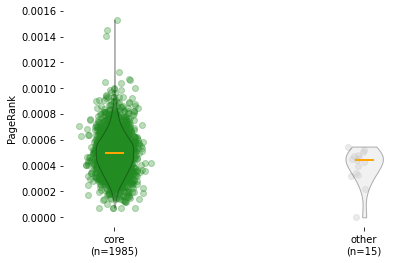

In [10]:
print('... PageRank centrality')
pagerank_cores = []
pagerank_others = []

if len(core_indexes)>1:
    pagerank_cores = np.array(dgraph.personalized_pagerank(vertices=core_indexes, directed=True, damping=0.85, reset="is_core"))
if len(other_indexes)>1:
    pagerank_others = np.array(dgraph.personalized_pagerank(vertices=other_indexes, directed=True, damping=0.85, reset="is_core"))
    
if len(core_indexes)>1 and len(other_indexes)>1:
    
    # description
    print("    cores: "+str(stats.describe(pagerank_cores)) )
    print("    others: "+str(stats.describe(pagerank_others)) )
    # significativity
    print("    Kruskal-Wallis test:  %.3f p= %.3f" % stats.kruskal(pagerank_cores, pagerank_others))
    d,_ = stats.ks_2samp(pagerank_cores, pagerank_others) # non-parametric measure of effect size [0,1]
    print('    Kolmogorov-Smirnov Effect Size: %.3f' % d)

    fig, ax = plt.subplots()
    xs = np.random.normal(1, 0.04, len(pagerank_cores))
    plt.scatter(xs, pagerank_cores, alpha=0.3, c='forestgreen')
    xs = np.random.normal(2, 0.04, len(pagerank_others))
    plt.scatter(xs, pagerank_others, alpha=0.3, c='silver')
    vp = ax.violinplot([pagerank_cores,pagerank_others], widths=0.15, showextrema=False, showmedians=True)
    for pc in vp['bodies']:
        pc.set_edgecolor('black')
    for pc,cb in zip(vp['bodies'],['#228B224d','#D3D3D34d']):
        pc.set_facecolor(cb)
    vp['cmedians'].set_color('orange')
    vp['cmedians'].set_linewidth(2.)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel('PageRank')
    plt.xticks([1, 2], ["core\n(n={:d})".format(len(pagerank_cores)), "other\n(n={:d})".format(len(pagerank_others))])
    fig.savefig(exp_path+"/results/global_cores_others_pagerank_%s.svg"%(scan_id), transparent=True)
    plt.show()
